<h1>5. Binary classification </h1>

In [34]:
import pandas as pd
import numpy as np

df = pd.read_csv('../student-por.csv', sep=';')
df['finalResult'] = df["G3"].apply(lambda x: 'pass' if x> 9 else 'fail')

<h3>5.1 Preprocess the data. Use the function « ColumnTransformer » to do that. Explain precisely each step, in particular when you drop, impute or transform the variables. Try several approachs.</h3>

 *il y a-t-il des valeurs manquants ?*

In [35]:
df.isnull().any()

school         False
sex            False
age            False
address        False
famsize        False
Pstatus        False
Medu           False
Fedu           False
Mjob           False
Fjob           False
reason         False
guardian       False
traveltime     False
studytime      False
failures       False
schoolsup      False
famsup         False
paid           False
activities     False
nursery        False
higher         False
internet       False
romantic       False
famrel         False
freetime       False
goout          False
Dalc           False
Walc           False
health         False
absences       False
G1             False
G2             False
G3             False
finalResult    False
dtype: bool

 *  *identifier les valeur quantitatifs et qualitatifs*

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school       649 non-null    object
 1   sex          649 non-null    object
 2   age          649 non-null    int64 
 3   address      649 non-null    object
 4   famsize      649 non-null    object
 5   Pstatus      649 non-null    object
 6   Medu         649 non-null    int64 
 7   Fedu         649 non-null    int64 
 8   Mjob         649 non-null    object
 9   Fjob         649 non-null    object
 10  reason       649 non-null    object
 11  guardian     649 non-null    object
 12  traveltime   649 non-null    int64 
 13  studytime    649 non-null    int64 
 14  failures     649 non-null    int64 
 15  schoolsup    649 non-null    object
 16  famsup       649 non-null    object
 17  paid         649 non-null    object
 18  activities   649 non-null    object
 19  nursery      649 non-null    

**Using as predictors the first 31 variables.**

In [37]:
from sklearn.model_selection import train_test_split

data_y = df['finalResult']
data_x = df.drop(['finalResult','G3','G2'], axis = 1)
# les variables du résultat final et de la note académique proviennent de G3, donc
# les utiliser pour prédire G3 ou inversement rendra le modèle erroné 
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.20)

data_x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,9
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,11


**Preprocessing**

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

qualitative_var = ["school","sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"]
quantitative_var = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1']

qualitative_pipeline = Pipeline([
     ('encoder', OneHotEncoder(drop = 'first'))
])

quantitative_pipeline = Pipeline([
     ('min_max_scaler', MinMaxScaler())
])
 
preprocessor = ColumnTransformer(remainder='passthrough',
                                 transformers=[
                                   ('transform_quantitatif',qualitative_pipeline, qualitative_var),
                                    ('transform_qualitatif',quantitative_pipeline,quantitative_var),
#                                       
                                 ])

<h3>K-NearestNeighbors</h3> 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN = Pipeline(
    steps=[("preprocess",preprocessor),
           ("KNN",KNeighborsClassifier())])

hyperKNN = {'KNN__n_neighbors':[2,3,4,5],'KNN__p':[1,2,3,4],'KNN__weights':['uniform','distance']}
gridKNN = GridSearchCV(KNN,hyperKNN,cv=3)

gridKNN.fit(x_train,y_train)

modelKNN = gridKNN.best_estimator_

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

In [40]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

 

metric_results = {}
def metrics( model, name, result_dic ):
    
    result = model.predict(x_test)
    confusion_m = confusion_matrix(result, y_test)
    ConfusionMatrixDisplay(confusion_m).plot()
    
    sc = model.score(x_test,y_test)
    ps = precision_score(result,y_test,average='macro')
    rs = recall_score(result,y_test,average='macro')
    f1 = f1_score(result,y_test,average='macro')
    
    print(name +' Score :',sc)
    result_dic[name +' Score' ] = sc
    print(name +' Precision Score :',ps)
    result_dic[name +' Precision Score' ] = ps
    print(name +' Recall Score :',rs)
    result_dic[name +' Recall Score' ] = rs
    print(name + ' F1 Score :',f1)
    result_dic[name +' F1 Score' ] = f1
    
     
    
    
#pour evaluer les resultats je fais une prediction sur mes donnees de x_test et 



KNeighbors Score : 0.8615384615384616
KNeighbors Precision Score : 0.48695652173913045
KNeighbors Recall Score : 0.4409448818897638
KNeighbors F1 Score : 0.4628099173553719


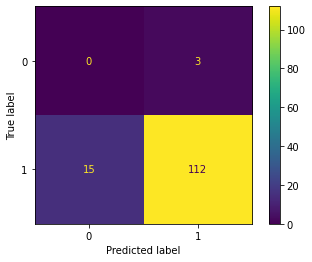

In [41]:
metrics(modelKNN, 'KNeighbors', metric_results)

<h3>Support Vector Machine classifier.</h3> 

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

SVM = Pipeline(
    steps=[("preprocess",preprocessor),
           ("SVM",SVC(probability=True))])

hyperSVM = {'SVM__C':[1,2,3],'SVM__kernel':['linear', 'poly', 'rbf', 'sigmoid'],'SVM__decision_function_shape':['ovo','ovr']}
gridSVM = GridSearchCV(SVM,hyperSVM,cv=3)

gridSVM.fit(x_train,y_train)
modelSVM = gridSVM.best_estimator_


* <h4>confusion matrix, precision, recall ,F1 score.</h4>

Support Vector Machine Score : 0.8846153846153846
Support Vector Machine Precision Score : 0.7028985507246377
Support Vector Machine Recall Score : 0.7155172413793103
Support Vector Machine F1 Score : 0.7089117778772951


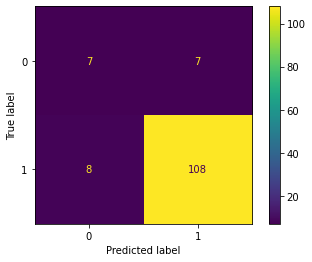

In [43]:
metrics(modelSVM, 'Support Vector Machine', metric_results)

<h3> Linear Discriminant Analysis classifier.</h3> 

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

LDA = Pipeline(
    steps=[("preprocess",preprocessor),
           ("LDA",LinearDiscriminantAnalysis())])

hyperLDA = {'LDA__solver':['svd', 'lsqr', 'eigen'],'LDA__store_covariance':['True','False']}
gridLDA = GridSearchCV(LDA,hyperLDA,cv=3)

gridLDA.fit(x_train,y_train)
modelLDA = gridLDA.best_estimator_

In [45]:
LinearDiscriminantAnalysis().get_params().keys() 

dict_keys(['n_components', 'priors', 'shrinkage', 'solver', 'store_covariance', 'tol'])

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

Linear Discriminant Analysis Score : 0.8923076923076924
Linear Discriminant Analysis Precision Score : 0.736231884057971
Linear Discriminant Analysis Recall Score : 0.736231884057971
Linear Discriminant Analysis F1 Score : 0.736231884057971


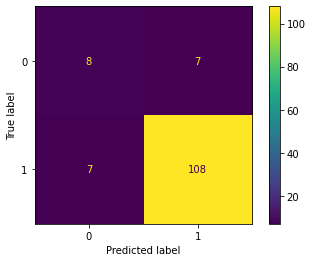

In [46]:
metrics(modelLDA, 'Linear Discriminant Analysis', metric_results)

<h3> Logistic Regression classifier.</h3> 

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LR = Pipeline(
    steps=[("preprocess",preprocessor),
           ("LR",LogisticRegression())])

hyperLR = {'LR__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'LR__max_iter':[200,300]}
gridLR = GridSearchCV(LR,hyperLR,cv=3)

gridLR.fit(x_train,y_train)
modelLR = gridLR.best_estimator_

In [48]:
gridLR.best_params_ 

{'LR__max_iter': 200, 'LR__solver': 'newton-cg'}

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

Logistic Regression Score : 0.9
Logistic Regression Precision Score : 0.6536231884057971
Logistic Regression Recall Score : 0.771516393442623
Logistic Regression F1 Score : 0.6899651440102734


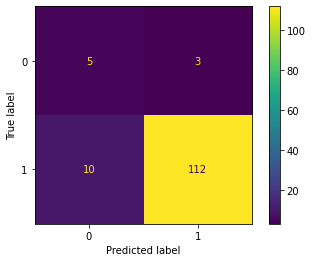

In [49]:
metrics(modelLR, 'Logistic Regression', metric_results)

<h3>Decision Tree classifier.</h3> 

In [50]:
from sklearn.tree import DecisionTreeClassifier

tree = Pipeline(
    steps=[("preprocess",preprocessor),
           ("tree",DecisionTreeClassifier(random_state=0))])

hypertree = {"tree__criterion":("gini", "entropy"), "tree__splitter": ["best","random"]}
gridtree = GridSearchCV(tree,hypertree,cv=3)

gridtree.fit(x_train,y_train)
modeltree = gridtree.best_estimator_

In [51]:
gridtree.best_params_ 

{'tree__criterion': 'entropy', 'tree__splitter': 'best'}

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

Decision Tree Classifier Score : 0.8538461538461538
Decision Tree Classifier Precision Score : 0.6855072463768116
Decision Tree Classifier Recall Score : 0.6587301587301587
Decision Tree Classifier F1 Score : 0.670270991856895


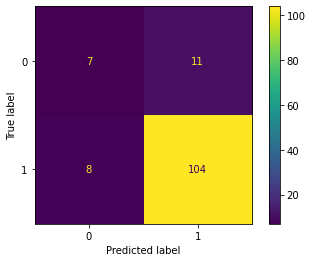

In [52]:
metrics(modeltree, 'Decision Tree Classifier', metric_results)

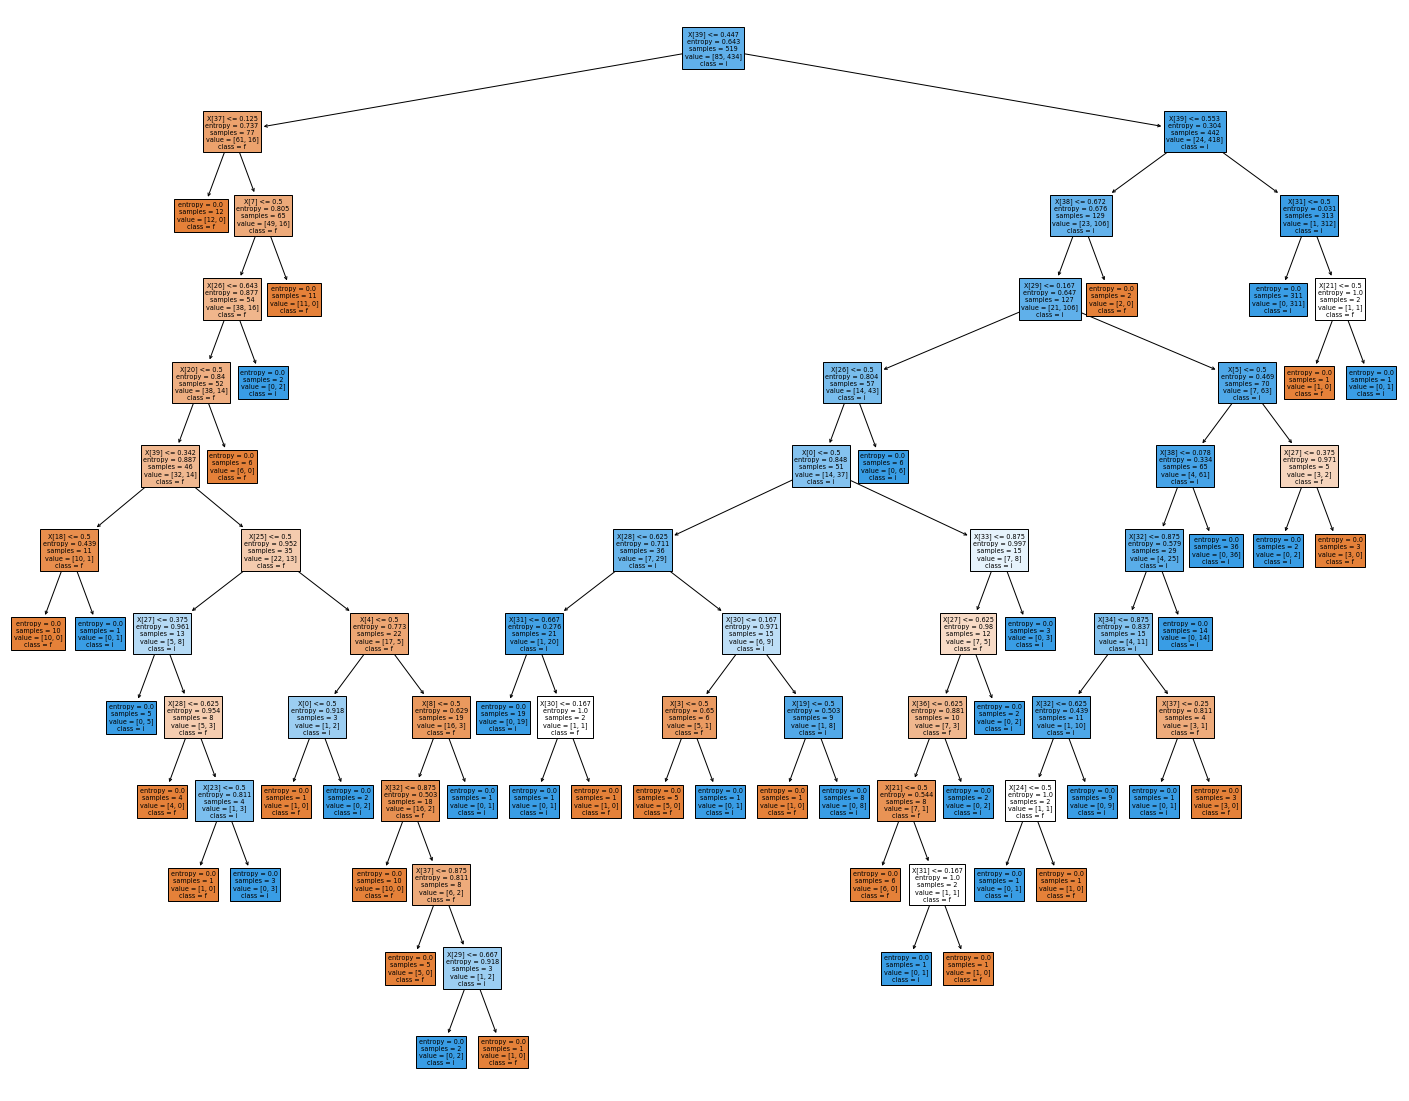

In [53]:
import matplotlib.pyplot as plt
from sklearn import tree
temp = quantitative_var.copy()
result = gridtree.best_estimator_
features = temp.append(result['preprocess'].transformers_[0][1][0].get_feature_names())
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(result['tree'], 
                feature_names=features,  
                   class_names='finalResult',
                   filled=True)
fig.savefig("decistion_tree_binary.png")

<h3>Voting classifier.</h3>

Un classificateur de vote est une méthode de classification qui utilise plusieurs classificateurs pour faire des prédictions.
il comporte deux hyperparamètres: les modèles et le type de vote,
si le vote est "hard"
il choisira parmi les différentes sorties de chaque modèle fourni, celle qui apparaîtra le plus
si le vote est "soft"
il utilisera une stratégie de poids

Voting Score : 0.8846153846153846
Voting Precision Score : 0.6739130434782609
Voting Recall Score : 0.711864406779661
Voting F1 Score : 0.6900333810205055


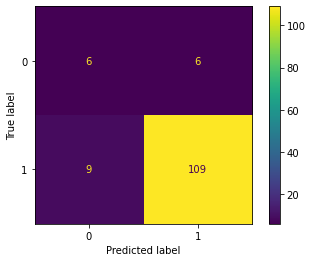

In [54]:
from sklearn.ensemble import VotingClassifier
 
voting = VotingClassifier(estimators=[
        ('KNN', modelKNN),('Support vector machine', modelSVM), ('Logistic Regression', modelLR), ('Tree', modeltree)], voting='soft')
gridVo = GridSearchCV(voting,{'voting':["hard","soft"]},cv=3)

voting = gridVo.fit(x_train, y_train).best_estimator_
metrics(voting,"Voting",metric_results)

<h3>Random Forest Classifier.</h3> 

In [55]:
from sklearn.ensemble import RandomForestClassifier
 

RF = Pipeline(
    steps=[("preprocess",preprocessor),
           ("RF",RandomForestClassifier())])

hyperRF = {'RF__n_estimators':[100,150,200],'RF__criterion':['gini','entropy'],'RF__max_features':['auto','log2']},
gridRF = GridSearchCV(RF,hyperRF,cv=3)

gridRF.fit(x_train,y_train)
modelRF= gridLR.best_estimator_

In [56]:
gridRF.best_params_ 

{'RF__criterion': 'gini', 'RF__max_features': 'auto', 'RF__n_estimators': 150}

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

Random Forest Classifier Score : 0.9
Random Forest Classifier Precision Score : 0.6536231884057971
Random Forest Classifier Recall Score : 0.771516393442623
Random Forest Classifier F1 Score : 0.6899651440102734


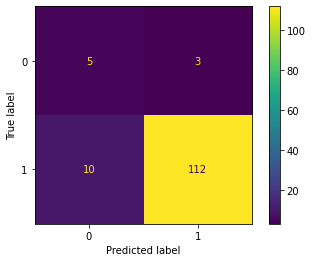

In [57]:
metrics(modelRF, 'Random Forest Classifier', metric_results)

<h3> Gradient Boosting Classifier.</h3> 

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
 

GB = Pipeline(
    steps=[("preprocess",preprocessor),
           ("GB",GradientBoostingClassifier())])

hyperGB = {'GB__n_estimators':[100,150,200],'GB__loss':['deviance','exponential'],'GB__criterion':['friedman_mse','mse',]},
gridGB = GridSearchCV(GB,hyperGB,cv=3)

gridGB.fit(x_train,y_train)
modelGB= gridGB.best_estimator_

In [59]:
gridGB.best_params_ 

{'GB__criterion': 'friedman_mse',
 'GB__loss': 'exponential',
 'GB__n_estimators': 100}

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

Gradient Boosting Classifier Score : 0.9
Gradient Boosting Classifier Precision Score : 0.7405797101449275
Gradient Boosting Classifier Recall Score : 0.7555418719211823
Gradient Boosting Classifier F1 Score : 0.7477235408269891


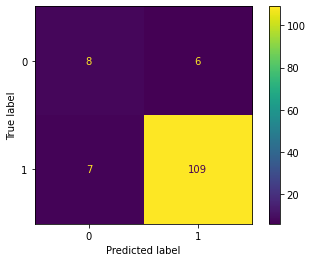

In [60]:
metrics(modelGB, 'Gradient Boosting Classifier', metric_results)

<h3> Ada Boost Classifier.</h3> 

In [61]:
from sklearn.ensemble import AdaBoostClassifier
 

AB = Pipeline(
    steps=[("preprocess",preprocessor),
           ("AB",AdaBoostClassifier())])

hyperAB = {'AB__n_estimators':[50,100,150],'AB__algorithm':['SAMME','SAMME.R'],'AB__learning_rate':[1,2]},
gridAB = GridSearchCV(AB,hyperAB,cv=3)

gridAB.fit(x_train,y_train)
modelAB= gridAB.best_estimator_

In [62]:
gridAB.best_params_ 

{'AB__algorithm': 'SAMME', 'AB__learning_rate': 1, 'AB__n_estimators': 100}

 * <h4>confusion matrix, precision, recall ,F1 score.</h4>

Ada Boost Classifier Score : 0.9
Ada Boost Classifier Precision Score : 0.7985507246376811
Ada Boost Classifier Recall Score : 0.7554563492063493
Ada Boost Classifier F1 Score : 0.7743959417968228


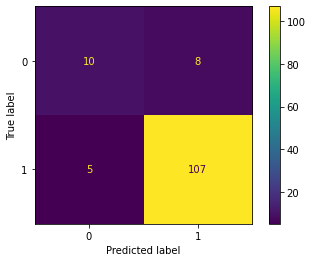

In [63]:
metrics(modelAB, 'Ada Boost Classifier', metric_results)

<h2>Results</h2>

In [64]:
pip install ipy_table

Note: you may need to restart the kernel to use updated packages.


In [65]:
from ipy_table import *

# dictionary
dict = metric_results

# lists
temp = []
dictList = []

# convert the dictionary to a list
for key, value in dict.items():
    temp = [key,value]
    dictList.append(temp)

# create table with make_table
make_table(dictList)

# apply some styles to the table after it is created
set_column_style(0, width='100', bold=True, color='hsla(225, 80%, 94%, 1)')
set_column_style(1, width='100')

# render the table
render()

KNeighbors Score,0.8615
KNeighbors Precision Score,0.4870
KNeighbors Recall Score,0.4409
KNeighbors F1 Score,0.4628
Support Vector Machine Score,0.8846
Support Vector Machine Precision Score,0.7029
Support Vector Machine Recall Score,0.7155
Support Vector Machine F1 Score,0.7089
Linear Discriminant Analysis Score,0.8923
Linear Discriminant Analysis Precision Score,0.7362
Linear Discriminant Analysis Recall Score,0.7362
